In [1]:
import pykoop
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns
import sklearn
import pysindy as ps
from tools import plot_main, plot_clustered_kuramoto

# 数据生成

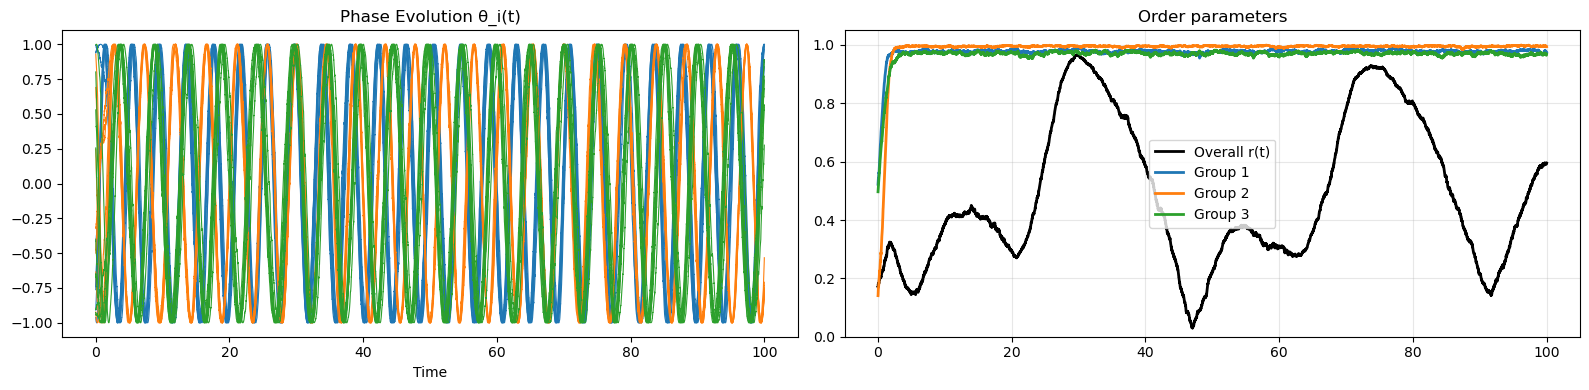

In [2]:
N=24
X_train, K_matrix = plot_clustered_kuramoto(
    N=N,          # 振子数
    n_clusters=3,  # 团数
    K_intra=5,   # 团内耦合
    K_inter=0.1,   # 团间耦合
    noise=0.01,
    T=100,
    random_state=0
)


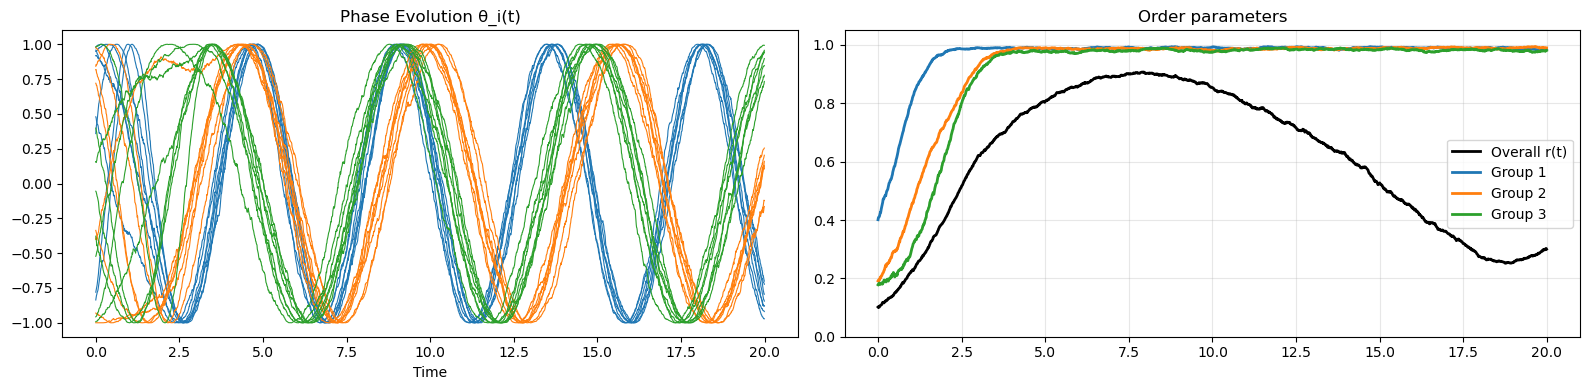

In [3]:
X_test, K_matrix = plot_clustered_kuramoto(
    N=N,          # 振子数
    n_clusters=3,  # 团数
    K_intra=5,   # 团内耦合
    K_inter=0.1,   # 团间耦合
    noise=0.01,
    T=20,
    random_state=42
)

# Koopman拟合

In [4]:
#多项式函数
kp = pykoop.KoopmanPipeline(
    lifting_functions=[
        ('ma', pykoop.SkLearnLiftingFn(MaxAbsScaler())),
        ('pl', pykoop.PolynomialLiftingFn(order=1,interaction_only=True)),
        ('ss', pykoop.SkLearnLiftingFn(StandardScaler()))
    ],
    regressor=pykoop.Edmd(alpha=0.5),
    #regressor=pykoop.Dmd(tsvd=pykoop.Tsvd(truncation='unknown_noise')),#,truncation_param=20
)
# Fit the pipeline
kp.fit(
    X_embed,
    n_inputs=0
)
error = -kp.score(X_embed)
error

np.float64(0.035375393019818145)

In [10]:
# 径向基函数
kp = pykoop.KoopmanPipeline(
    lifting_functions=[
        ('ma', pykoop.SkLearnLiftingFn(MaxAbsScaler())),
        ('rbf', pykoop.RbfLiftingFn(rbf='gaussian',centers=pykoop.ClusterCenters(estimator=sklearn.cluster.KMeans(n_clusters=24)),shape=1)),
        ('ss', pykoop.SkLearnLiftingFn(StandardScaler()))
    ],
    regressor=pykoop.Edmd(alpha=0.5),
)
# Fit the pipeline
kp.fit(
    X_embed,
    n_inputs=0
)
error = -kp.score(X_embed)
error

np.float64(0.0436764574072448)

In [5]:
#kernal，随机傅立叶表征
kp = pykoop.KoopmanPipeline(
    lifting_functions=[(
        'rff',
        pykoop.KernelApproxLiftingFn(
            kernel_approx=pykoop.RandomFourierKernelApprox(
                n_components=24,
                random_state=10,
            )),
    )],
    regressor=pykoop.Edmd(alpha=0.5),
)

kp.fit(
    X_embed,
    n_inputs=0
)
error = -kp.score(X_embed)
error

np.float64(0.03669407310433198)

In [16]:
#延迟嵌入，Hankel
kp = pykoop.KoopmanPipeline(
    lifting_functions=[
        ('ma', pykoop.SkLearnLiftingFn(MaxAbsScaler())),
        ('delay', pykoop.DelayLiftingFn(n_delays_state=2)),
        ('ss', pykoop.SkLearnLiftingFn(StandardScaler()))
    ],
    regressor=pykoop.Edmd(alpha=0.5),
    #regressor=pykoop.Dmd(tsvd=pykoop.Tsvd(truncation='unknown_noise')),
    #regressor=pykoop.Dmd(tsvd=pykoop.Tsvd(truncation='rank',truncation_param=4)),
)
# Fit the pipeline
kp.fit(
    X_embed,
    n_inputs=0
)
error = -kp.score(X_embed)
error


np.float64(0.08357105909849975)

# SINDy

In [36]:
dt=0.01
# model = ps.SINDy()
# model.fit(X_train, t=dt)
#model.print()

# stlsq_optimizer = ps.STLSQ(threshold=0.01, alpha=0.5)
# model = ps.SINDy(optimizer=stlsq_optimizer)
# model.fit(X_train, t=dt)
# model.print()
sr3_optimizer = ps.SR3(reg_weight_lam=0.5, regularizer="l2")
fourier_library = ps.FourierLibrary(n_frequencies=2)
model = ps.SINDy(feature_library=fourier_library, optimizer=sr3_optimizer)
model.fit(X_train, t=dt)
model.print()

(x0)' = 0.001 sin(1 x0) + 0.018 cos(1 x0) + -0.035 sin(1 x1) + -0.002 cos(1 x1) + -0.023 sin(1 x2) + 0.008 cos(1 x2) + -0.337 sin(1 x3) + 0.006 cos(1 x3) + 0.022 sin(1 x4) + 0.281 sin(1 x5) + -0.022 cos(1 x5) + 0.129 sin(1 x6) + 0.009 cos(1 x6) + -0.008 sin(1 x7) + -0.026 cos(1 x7) + -0.136 sin(1 x8) + -0.009 cos(1 x8) + 0.059 sin(1 x9) + -0.041 cos(1 x9) + -0.261 sin(1 x10) + 0.015 cos(1 x10) + -0.287 sin(1 x11) + -0.019 cos(1 x11) + 0.048 sin(1 x12) + 0.007 cos(1 x12) + 0.511 sin(1 x13) + 0.015 cos(1 x13) + -0.013 sin(1 x14) + -0.026 cos(1 x14) + -0.066 sin(1 x15) + -0.009 cos(1 x15) + -0.240 sin(1 x16) + 0.055 cos(1 x16) + -0.094 sin(1 x17) + -0.022 cos(1 x17) + -0.297 sin(1 x18) + 0.029 cos(1 x18) + 0.108 sin(1 x19) + -0.059 cos(1 x19) + 0.158 sin(1 x20) + 0.016 cos(1 x20) + 0.298 sin(1 x21) + 0.021 cos(1 x21) + 0.132 sin(1 x22) + 0.041 cos(1 x22) + 0.004 sin(1 x23) + -0.025 cos(1 x23) + -0.832 sin(1 x24) + 0.013 cos(1 x24) + -0.024 sin(1 x25) + 0.236 sin(1 x26) + -0.012 cos(1 x26)

/opt/anaconda3/envs/py311/lib/python3.11/site-packages/pysindy/optimizers/sr3.py:374: ConvergenceWarning: SR3 did not converge after 30 iterations.
  warnings.warn(


/var/folders/mw/53dhwskj4zq47dtls4lhht4m0000gn/T/ipykernel_85307/1050168779.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


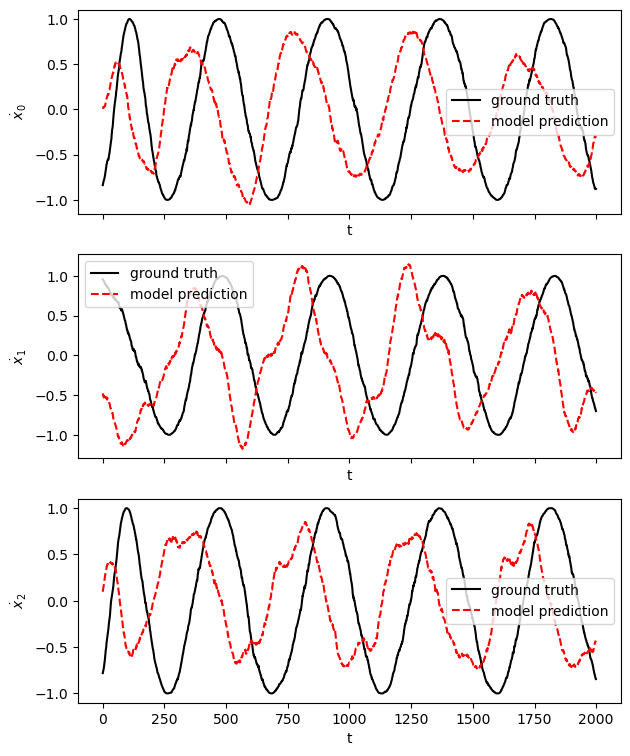

In [37]:
X_test_predicted = model.predict(X_test)

# Compute derivatives with a finite difference method, for comparison
x_dot_test_computed = model.differentiation_method(X_test, t=dt)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7, 9))
for i in range(3):
    axs[i].plot(X_test[:, i], "k", label="ground truth")
    axs[i].plot(X_test_predicted[:, i], "r--", label="model prediction")
    axs[i].legend()
    axs[i].set(xlabel="t", ylabel=r"$\dot x_{}$".format(i))
fig.show()

In [38]:
model.score(X_test, t=dt)

0.5105233155840052

# 矩阵稀疏性

(<Figure size 640x480 with 2 Axes>, <Axes: >)

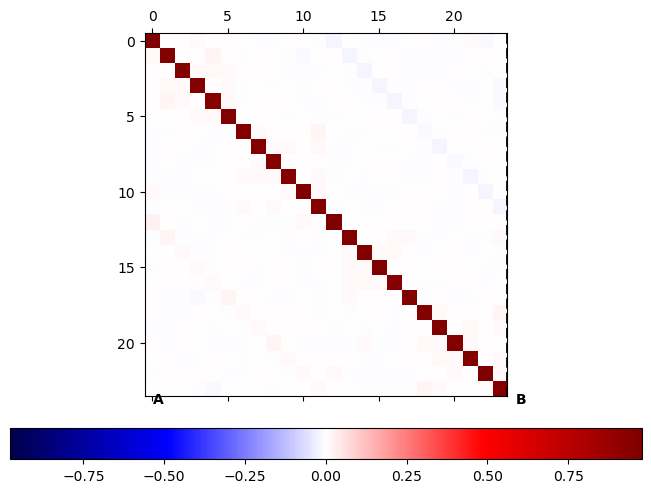

In [26]:
kp.regressor_.plot_koopman_matrix()

In [18]:
def matrix_l1_norm_manual(matrix):
    """
    手动计算矩阵的L1范数（不使用numpy）
    """
    
    rows = len(matrix)
    cols = len(matrix[0])
    
    # 计算每列的绝对值之和
    column_sums = []
    for j in range(cols):
        col_sum = 0
        for i in range(rows):
            col_sum += abs(matrix[i][j])
        column_sums.append(col_sum)
    
    # 返回最大的列和
    return max(column_sums)

A = kp.regressor_.coef_
matrix_l1_norm_manual(A)

np.float64(1.353833391599329)

In [28]:
import numpy as np

def matrix_l0_norm_corrected(matrix, threshold=1e-10):
    """
    计算矩阵的L0范数（各列非零元素数量的最大值）
    
    参数:
    matrix: numpy数组或可以转换为numpy数组的矩阵
    threshold: 阈值，绝对值小于此值的元素视为零
    
    返回:
    l0_norm: 矩阵的L0范数（整数）
    column_norms: 各列的L0范数
    """
    matrix = np.array(matrix, dtype=float)
    
    # 应用阈值：将接近零的元素视为零
    matrix_thresholded = np.where(np.abs(matrix) < threshold, 0, matrix)
    
    # 计算每列的非零元素数量
    column_norms = []
    for col in range(matrix_thresholded.shape[1]):
        non_zero_count = np.count_nonzero(matrix_thresholded[:, col])
        column_norms.append(non_zero_count)
    
    # 矩阵的L0范数是各列L0范数的最大值
    l0_norm = max(column_norms)
    
    return l0_norm

A = kp.regressor_.coef_
matrix_l0_norm_corrected(A,0.05)

1

In [23]:
np.min(A)

np.float64(-0.01992315738463101)

# 真伪特征值

总特征值数量: 48
res阈值: 0.01
可靠特征值数量 (res <= 0.01): (2, [32, 33])
虚假特征值数量 (res > 0.01): 46
残差RES的范围：0.014144 ~ 0.239918


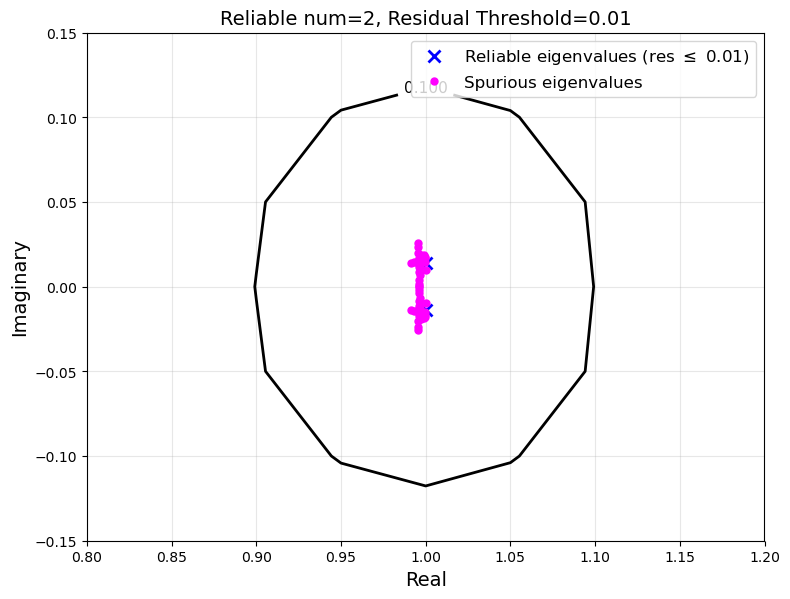

In [428]:
eigenvalues, residuals, reliable_indices = plot_main(kp, X_embed)

# 多步预测

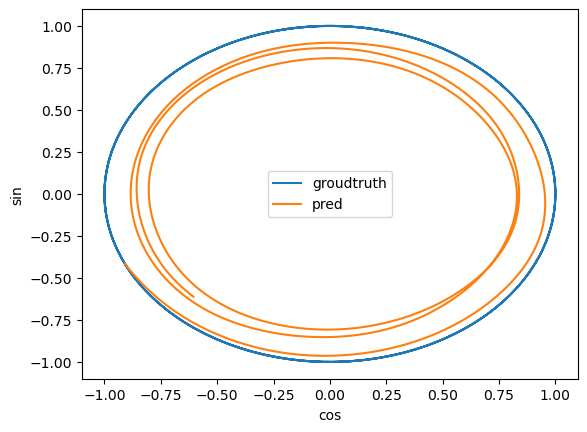

In [429]:
p_steps = 1000
X_test = X_embed[:p_steps,:]
pred = kp.predict_trajectory(X_test,None)
plt.figure()
plt.plot(X_test[:,0],X_test[:,N],label='groudtruth')
plt.plot(pred[:,0],pred[:,N],label='pred')
plt.xlabel('cos')
plt.ylabel('sin')
plt.legend()
plt.show()


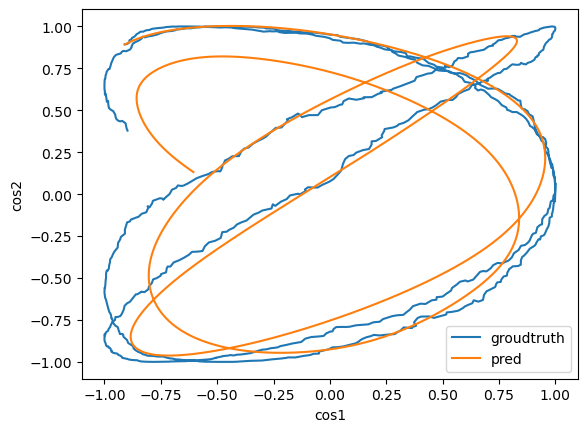

In [430]:
p_steps = 1000
X_test = X_embed[:p_steps,:]
pred = kp.predict_trajectory(X_test,None)
plt.figure()
plt.plot(X_test[:,0],X_test[:,1],label='groudtruth')
plt.plot(pred[:,0],pred[:,1],label='pred')
plt.xlabel('cos1')
plt.ylabel('cos2')
plt.legend()
plt.show()

# 特征谱与SVD分析

(48, 48)


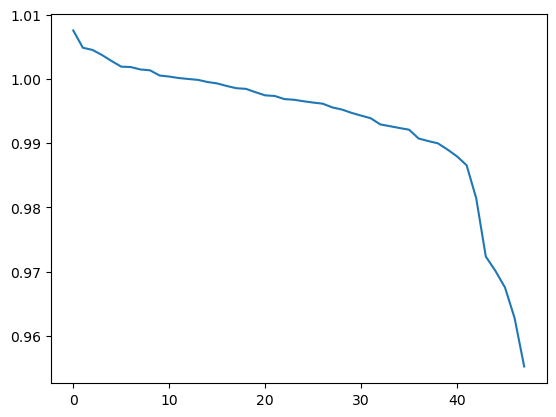

In [433]:
A = kp.regressor_.coef_
print(A.shape)
U,S,V = np.linalg.svd(A)
plt.figure()
plt.plot(S)
plt.show()

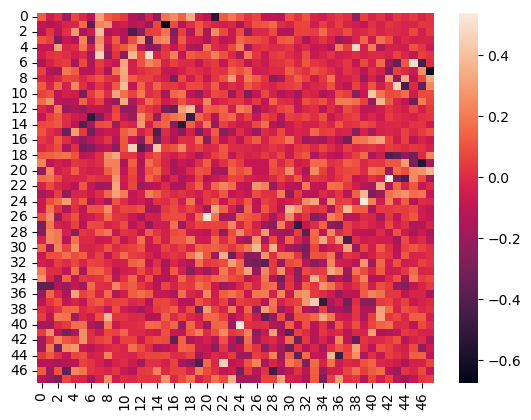

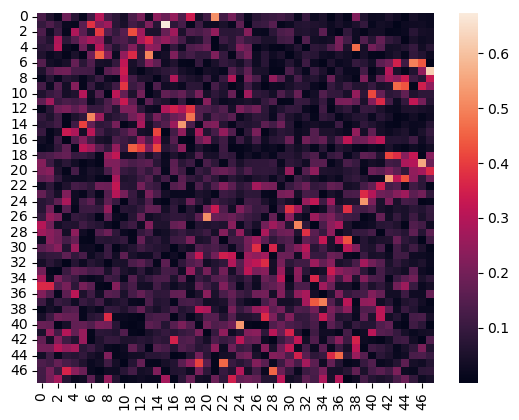

In [434]:
U_abs = np.abs(U)
plt.figure()
sns.heatmap(np.real(U))
plt.show()
plt.figure()
sns.heatmap(U_abs)
plt.show()

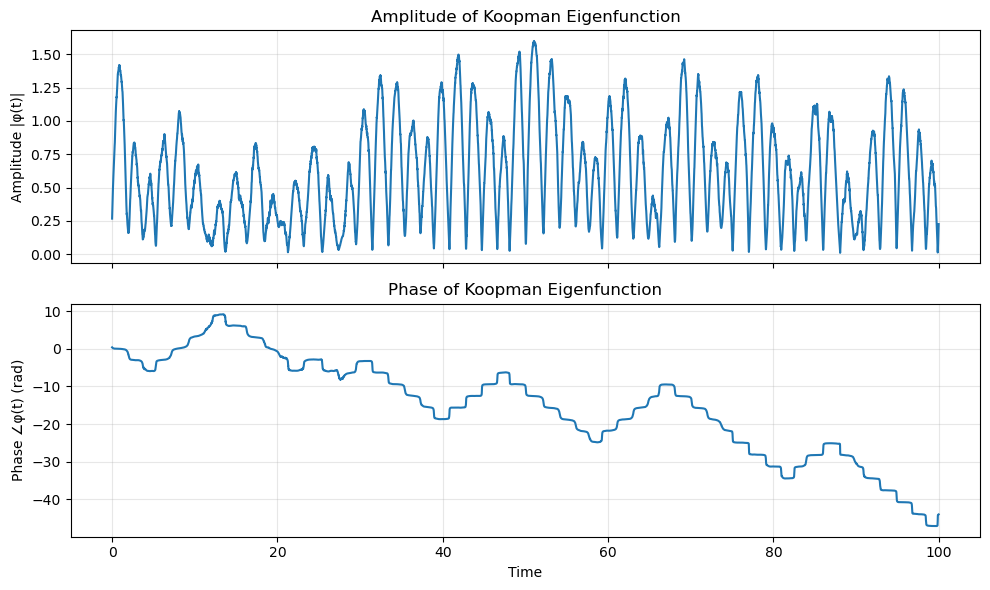

In [436]:
eig_val, left_vecs = np.linalg.eig(A.T)
eig_val, righ_vecs = np.linalg.eig(A)
phi = left_vecs @ kp.lift(X_embed).T

phi_to_plot = phi[0, :]

# 计算幅值和相位
amplitude = np.abs(phi_to_plot)
phase = np.angle(phi_to_plot)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# 1. 绘制幅值
ax1.set_title("Amplitude of Koopman Eigenfunction")
ax1.plot(t, amplitude)
ax1.set_ylabel("Amplitude |φ(t)|")
ax1.grid(True, alpha=0.3)

# 2. 绘制相位 (需要处理跳变)
ax2.set_title("Phase of Koopman Eigenfunction")
ax2.plot(t, np.unwrap(phase)) # np.unwrap() 可以消除-π到π的跳变
ax2.set_ylabel("Phase ∠φ(t) (rad)")
ax2.set_xlabel("Time")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


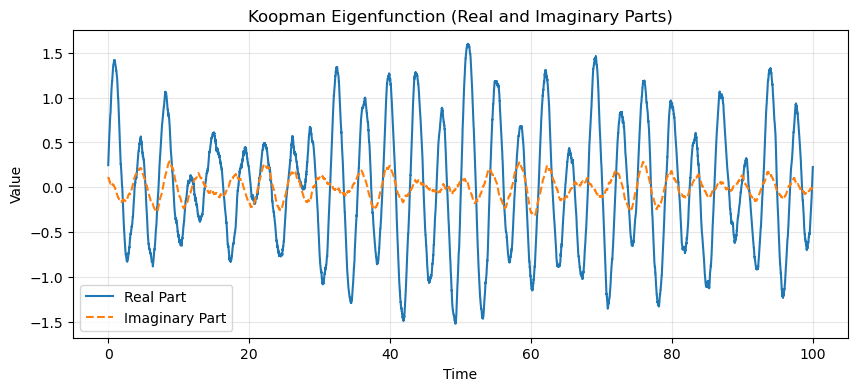

In [437]:
phi_to_plot = phi[0, :] # 选择第一个特征函数

plt.figure(figsize=(10, 4))
plt.title("Koopman Eigenfunction (Real and Imaginary Parts)")
plt.plot(t, np.real(phi_to_plot), label="Real Part")
plt.plot(t, np.imag(phi_to_plot), label="Imaginary Part", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

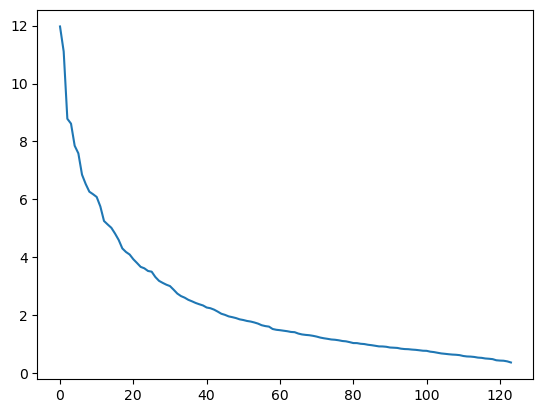

In [410]:
A_ = A @ np.linalg.inv(left_vecs)
U,S,V = np.linalg.svd(A_)
plt.figure()
#plt.plot(np.log(S))
plt.plot(S)
plt.show()

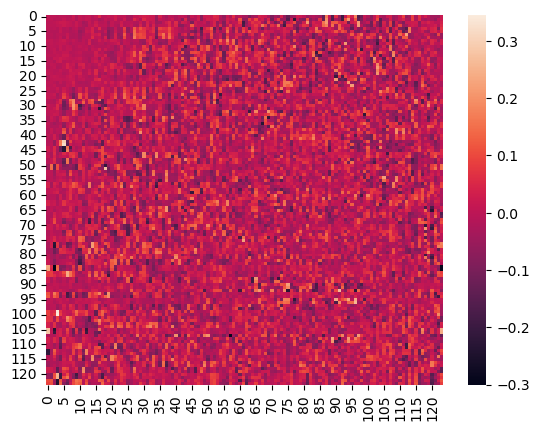

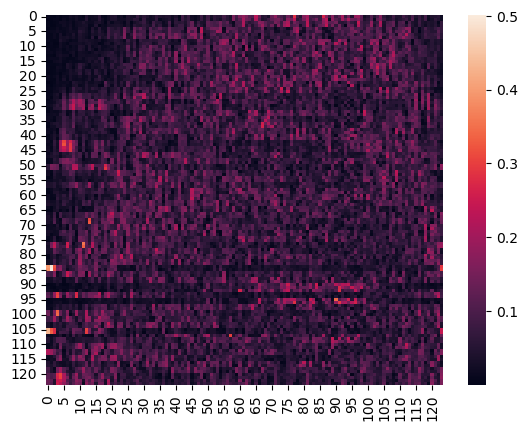

In [330]:
U_abs = np.abs(U)
plt.figure()
sns.heatmap(np.real(U))
plt.show()
plt.figure()
sns.heatmap(U_abs)
plt.show()

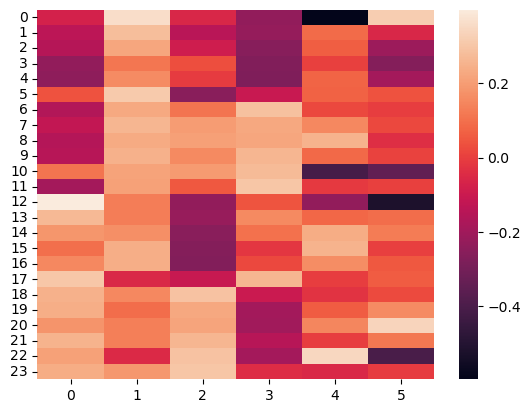

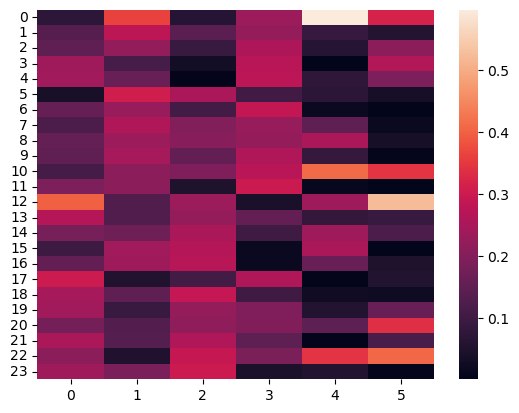

In [280]:
plt.figure()
sns.heatmap(U[:,:6])
plt.show()
plt.figure()
sns.heatmap(U_abs[:,:6])
plt.show()

(<Figure size 640x480 with 3 Axes>,
 array([<Axes: xlabel='$i$', ylabel='$\\sigma_i({\\bf U})$'>,
        <Axes: xlabel='$i$', ylabel='$\\sigma_i({\\bf A})$'>,
        <Axes: xlabel='$i$', ylabel='$\\sigma_i({\\bf B})$'>], dtype=object))

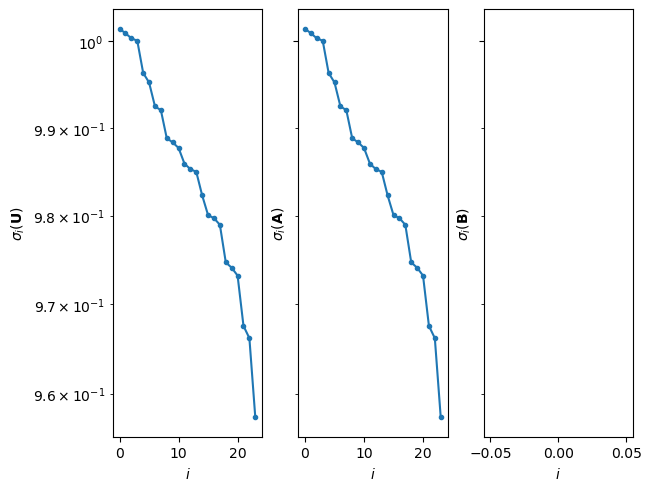

In [386]:
kp.regressor_.plot_svd()

In [128]:
pykoop.lmi_regressors

AttributeError: module 'pykoop' has no attribute 'lmi_regressors'